## Lecture 4: Big data: Challenges and Solutions

### MIT Practical Computing Tutorials for Earth Scientists
<hr>

### `xarray`: N-D labeled arrays and datasets in Python

##### About xarray

From their [website](http://xarray.pydata.org/en/stable/):

>`xarray` (formerly xray) is an open source project and Python package that makes working with labelled multi-dimensional arrays simple, efficient, and fun!
>
>Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. The package includes a large and growing library of domain-agnostic functions for advanced analytics and visualization with these data structures.
>
>Xarray is inspired by and borrows heavily from pandas, the popular data analysis package focused on labelled tabular data. It is particularly tailored to working with netCDF files, which were the source of xarray’s data model, and integrates tightly with dask for parallel computing.

In [105]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

#### Example: revisiting the Lecture02 `netCDF4` example of topographic elevation in the region surrounding Cold Bay, Alaska

`xarray.Dataset` objects are fully meta-data aware and much less clunky than the `netCDF4.Dataset` objects covered in Lecture02.

Enabled by the `netCDF4` dependency, the `xarray.open_dataset` function allows us to read a NETCDF4-formatted data into an `xarray.Dataset` object (which we will assign the name `ds`) which conveniently bundles together the datasets' various "Dimensions" (`ds.dims`), "Coordinates" (`ds.coords`), "Data variables" (`ds.data_vars`), and "Attributes" (`ds.attrs`).

Here, we will be only be working with already-constructed datasets but it is often useful to create our own `xarray.Dataset` objects from scratch, e.g. if we need to generate our own labelled N-dimensional datasets based on some raw data aquired in the field, lab, theory, or as output from a numerical simulation. Follow [these instructions](http://xarray.pydata.org/en/stable/data-structures.html) for how to generate your own `xarray` data structures.

In [106]:
ds = xr.open_dataset("../Lecture02_Objects_and_data_analysis/data/cold_bay_alaska_elevation.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 1351, lon: 1351)
Coordinates:
  * lat      (lat) float64 53.0 53.0 53.0 53.01 53.01 ... 55.99 56.0 56.0 56.0
  * lon      (lon) float64 -164.5 -164.5 -164.5 -164.5 ... -161.5 -161.5 -161.5
Data variables:
    crs      |S1 ...
    Band1    (lat, lon) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:              Point
    Conventions:                     ACDD 1.3, CF-1.6
    GDAL:                            GDAL 1.11.4, released 2016/01/25
    history:                         Tue Jul 26 17:48:38 2016: GDAL CreateCop...
    title:                           Cold Bay, Alaska 8 arc-second Coastal Di...
    GMT_version:                     4.5.13 [64-bit]
    node_offset:                     1
    summary:                         NOAA's National Geophysical Data Center ...
    keywords:                        Earth Science > Oceans > Bathymetry/Seaf...
    time_coverage_start:             1901-01-01
    time_coverage_end:               2012-01-01
    id:                              4955
    naming_authority:                gov.noaa.ngdc.mgg.dem
    source:                          NOS Hydrographic Surveys; Bench Mark Dat...
    comment:                         Developed for the University of Alaska a...
    license:                         Not to be used for navigation. Although ...
    creator_name:                    DOC/NOAA/NESDIS/NCEI > National Centers ...
    creator_email:                   dem.info@noaa.gov
    creator_url:                     http://www.ngdc.noaa.gov/mgg/dem
    project:                         ICSU-WDS > International Council for Sci...
    geospatial_bounds_crs:           World Geodetic System 1984
    geospatial_bounds_vertical_crs:  Mean Higher High Water height
    publisher_name:                  NOAA National Center for Environmental I...
    publisher_email:                 dem.info@noaa.gov
    publisher_url:                   http://www.ngdc.noaa.gov/mgg/dem
    geospatial_lat_min:              53.00
    geospatial_lat_max:              56.00
    geospatial_lon_min:              -164.50
    geospatial_lon_max:              -161.50
    cdm_data_type:                   Grid
    date_issued:                     2014-01-02; publication
    date_metadata_modified:          2016-07-28
    product_version:                 1
    keywords_vocabulary:             CF Standard Name Table v27
    references:                      Digital Elevation Models of Cold Bay and...
    creator_type:                    group or institution
    creator_institution:             DOC/NOAA/NESDIS/NCEI > National Centers ...
    publisher_type:                  institution
    geospatial_lat_units:            decimal degrees
    geospatial_lon_units:            decimal degrees
    geospatial_lon_resolution:       0.0022222222
    geospatial_lat_resolution:       0.0022222222
    geospatial_vertical_resolution:  0.0022222222

Variables like `lat` and `lon` which describe their own dimensions are represented as `Coordinates`.

In [107]:
ds.coords

Coordinates:
  * lat      (lat) float64 53.0 53.0 53.0 53.01 53.01 ... 55.99 56.0 56.0 56.0
  * lon      (lon) float64 -164.5 -164.5 -164.5 -164.5 ... -161.5 -161.5 -161.5

Data variables such as `Band1` are `xarray.DataArray` objects, which link an N-dimensional arrays of a variable's values with it's coordinates and various attributes (e.g. units).

In [108]:
ds['Band1']

<xarray.DataArray 'Band1' (lat: 1351, lon: 1351)>
[1825201 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 53.0 53.0 53.0 53.01 53.01 ... 55.99 56.0 56.0 56.0
  * lon      (lon) float64 -164.5 -164.5 -164.5 -164.5 ... -161.5 -161.5 -161.5
Attributes:
    long_name:     GDAL Band Number 1
    grid_mapping:  crs
    units:         meters
    positive:      up

Underlying all of the metadata infrastructure is a `numpy.Array` containing the variable's values:

In [109]:
ds['Band1'].values

array([[-4315.022   , -4310.901   , -4308.1685  , ..., -5232.706   ,
        -5216.3916  , -5210.885   ],
       [-4295.62    , -4291.772   , -4289.575   , ..., -5250.371   ,
        -5240.815   , -5233.7905  ],
       [-4256.6445  , -4258.5547  , -4258.311   , ..., -5229.3467  ,
        -5226.7207  , -5227.6055  ],
       ...,
       [  -91.729645,   -91.94089 ,   -92.047386, ...,   -27.725378,
          -27.651352,   -27.67808 ],
       [  -91.61961 ,   -91.689865,   -91.80033 , ...,   -29.278463,
          -28.086462,   -27.678217],
       [  -91.48    ,   -91.50936 ,   -91.62949 , ...,   -29.482727,
          -29.479567,   -29.442062]], dtype=float32)

#### Indexing `xarray` data structures

As with Python lists and numpy arrays, we can index `xarray` data structures by index.

In [110]:
ds['lon'][4:7]

<xarray.DataArray 'lon' (lon: 3)>
array([-164.491111, -164.488889, -164.486667])
Coordinates:
  * lon      (lon) float64 -164.5 -164.5 -164.5
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    actual_range:   [-164.50111111 -161.49888889]

One advantage of being meta-data aware objects, is that instead of having to remember the order of the dimensions when indexing (e.g. as in a `numpy.Array`), we can specify the indices along a dimensions using the `sel` method, with the dimension name as the argument key and a `slice` object as the argument value.

In [111]:
ds['lon'].isel(lon=slice(4,7))

<xarray.DataArray 'lon' (lon: 3)>
array([-164.491111, -164.488889, -164.486667])
Coordinates:
  * lon      (lon) float64 -164.5 -164.5 -164.5
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    actual_range:   [-164.50111111 -161.49888889]

The larger the number of dimensions and the more complicated the `dataset` structure, the more convenient this becomes!

In [112]:
ds['Band1'].isel(lon=slice(4,7), lat=slice(100,102))

<xarray.DataArray 'Band1' (lat: 2, lon: 3)>
array([[-3986.4412, -3984.175 , -3981.9475],
       [-3987.1123, -3985.0127, -3982.9277]], dtype=float32)
Coordinates:
  * lat      (lat) float64 53.22 53.22
  * lon      (lon) float64 -164.5 -164.5 -164.5
Attributes:
    long_name:     GDAL Band Number 1
    grid_mapping:  crs
    units:         meters
    positive:      up

Better yet, because our `xarray.Dataset` knows not only the dimension names, but also the values of the coordinate at each index, we can select specific coordinate values (with optional 'nearest' flag, for example, so the coordinate we want to select doesn't need to be an exact entry in the coordinate values).

In [113]:
cold_bay_lon = -162.718
cold_bay_lat = 55.205

In [114]:
print(ds['lon'].sel(lon=cold_bay_lon, method='nearest'), end='\n\n')
print(ds['lat'].sel(lat=cold_bay_lat, method='nearest'), end='\n\n')
print(ds['Band1'].sel(lon=cold_bay_lon, lat=cold_bay_lat, method='nearest'))

<xarray.DataArray 'lon' ()>
array(-162.71777778)
Coordinates:
    lon      float64 -162.7
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    actual_range:   [-164.50111111 -161.49888889]

<xarray.DataArray 'lat' ()>
array(55.20444444)
Coordinates:
    lat      float64 55.2
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    actual_range:   [52.99888889 56.00111111]

<xarray.DataArray 'Band1' ()>
array(23.584974, dtype=float32)
Coordinates:
    lat      float64 55.2
    lon      float64 -162.7
Attributes:
    long_name:     GDAL Band Number 1
    grid_mapping:  crs
    units:         meters
    positive:      up


Consider how intuitive and efficient the final command for finding the elevation of the town of Cold Bay is, compared the following implementation of the same operation using `numpy` indexing (Note that we had to first recall that the first dimension of `Band1` was `lat` and that the second dimensions was `lon`:

In [115]:
ds['Band1'][
    np.abs(ds['lat'] - cold_bay_lat).argmin(),
    np.abs(ds['lon'] - cold_bay_lon).argmin()
]

<xarray.DataArray 'Band1' ()>
array(23.584974, dtype=float32)
Coordinates:
    lat      float64 55.2
    lon      float64 -162.7
Attributes:
    long_name:     GDAL Band Number 1
    grid_mapping:  crs
    units:         meters
    positive:      up

#### Plotting `xarray.DataArray` objects

Because `xarray.DataArray` objects are meta-data aware, they include useful Python `methods` such as the `xarray.DataArray.plot()` method, which automatically knows how to label axes and colorbars (including units!)...

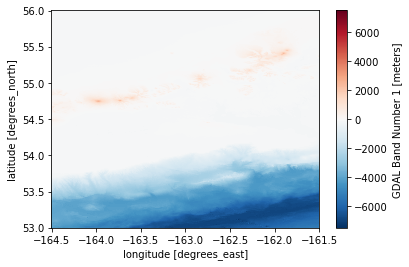

In [78]:
ds['Band1'].plot()

...which picks one of the follow plot types depending on the number of dimensions:
- `matplotlib.pyplot.plot()` line plots for 1-dimensional data
- `matplotlib.pyplot.pcolormesh()` colormaps for 2-dimensional data
- `matplotlib.pyplot.hist()` plots a histogram of values for data with either 0 dimensions (float) or more than 2 dimensions

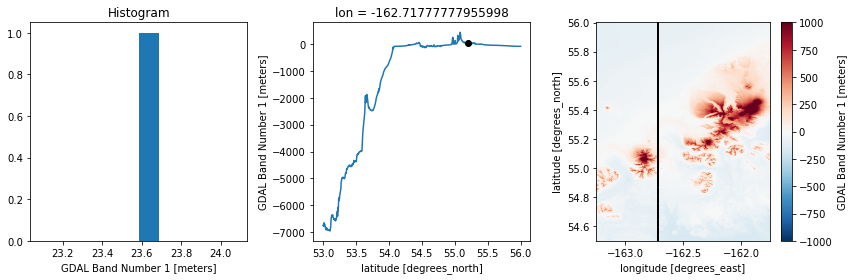

In [104]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
ds['Band1'].sel(lon=cold_bay_lon, lat=cold_bay_lat, method='nearest').plot()

plt.subplot(1,3,2)
ds['Band1'].sel(lon=cold_bay_lon, method='nearest').plot()
plt.plot(
    ds['lat'].sel(lat=cold_bay_lat, method='nearest'),
    ds['Band1'].sel(lon=cold_bay_lon, lat=cold_bay_lat, method='nearest'),
    'ko'
)

plt.subplot(1,3,3)
q = ds['Band1'].sel(lon=slice(-163.25, -161.75), lat=slice(54.5, 56.75)).plot()
q.set_clim([-1000.,1000.])
plt.plot(
    ds['lon'].sel(lon=cold_bay_lon, method='nearest').values * np.ones_like(ds['Band1'].sel(lon=cold_bay_lon, method='nearest')),
    ds['Band1'].sel(lon=cold_bay_lon, method='nearest'),
    "k--"
)

plt.tight_layout()